# M5 forecasting challenge

In [27]:

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import time	
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
from pylab import rcParams
rcParams['figure.dpi'] = 120
rcParams['savefig.dpi'] = 120 
rcParams['font.size'] = 10

In [2]:
data = pd.read_csv('../datasets/sales_train_validation.csv')
print(data.shape)
data.head()

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [3]:
sell_prices = pd.read_csv('../datasets/sell_prices.csv')
print(sell_prices.shape)
sell_prices.head()

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [4]:
submission = pd.read_csv('../datasets/sample_submission.csv')
print(submission.shape)
submission.head()

(771120, 29)


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,Total_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CA_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TX_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,WI_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CA_1_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
calendar = pd.read_csv('../datasets/calendar.csv')
print(calendar.shape)
calendar.head(10)

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


# testing

# data.head()

In [6]:
series_cols = data.columns[data.columns.str.contains("d_")].values

In [7]:
data_days = data[series_cols]
data_days.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [8]:
data[series_cols].sum() # 每日 卖出商品个数

d_1       32631
d_2       31749
d_3       23783
d_4       25412
d_5       19146
          ...  
d_1909    35343
d_1910    35033
d_1911    40517
d_1912    48962
d_1913    49795
Length: 1913, dtype: int64

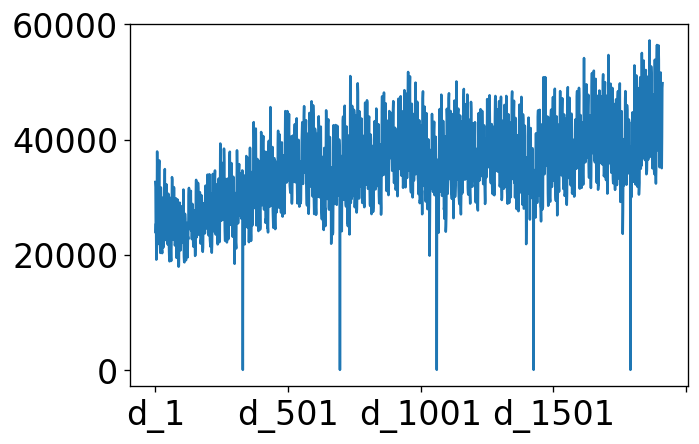

In [9]:
# 每日 所有产品 销售数量
data[series_cols].sum().plot()
# plt.bar(data[series_cols].sum()[0],data[series_cols].sum()[1])

# plt.title("Top-Level-1: Summed product sales of all stores and states")
# plt.ylabel("Unit sales of all products");
rcParams['figure.figsize'] = (17,5)


In [10]:
# 销量最低的几天
lowest_sale =  data[series_cols].sum()
lowest_sale = lowest_sale[lowest_sale<1000]
lowest_sale

d_331     13
d_697     11
d_1062    20
d_1427    20
d_1792    14
dtype: int64

In [11]:
lowest_sale.index
period = []
days = []
for i,val in enumerate(lowest_sale.index):
    days.append(int(val[2:]))
    if i+1 < len(lowest_sale.index):
        period.append( int(lowest_sale.index[i+1][2:])-int(lowest_sale.index[i][2:]))
    
print(period) # 周期性 下一次周期在 1792 + 356
next_period= 1792 + 356
next_period  # 下一次周期在 2148日，未在接下来预测一个月内。

[366, 365, 365, 365]


2148

In [12]:
data.groupby("state_id")[series_cols].sum()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
state_id,,,,,,,,,,,,,,,,,,,,,
CA,14195,13805,10108,11047,9925,11322,12251,16610,14696,11822,...,16255,20564,23032,17052,15784,15148,14488,17095,21834,23187
TX,9438,9630,6778,7381,5912,9006,6226,9440,9376,7319,...,10800,12460,13709,9868,10922,9600,9602,10615,12266,12282
WI,8998,8314,6897,6984,3309,8883,9533,11882,8664,6431,...,14734,15338,14899,11139,10864,10595,10943,12807,14862,14326


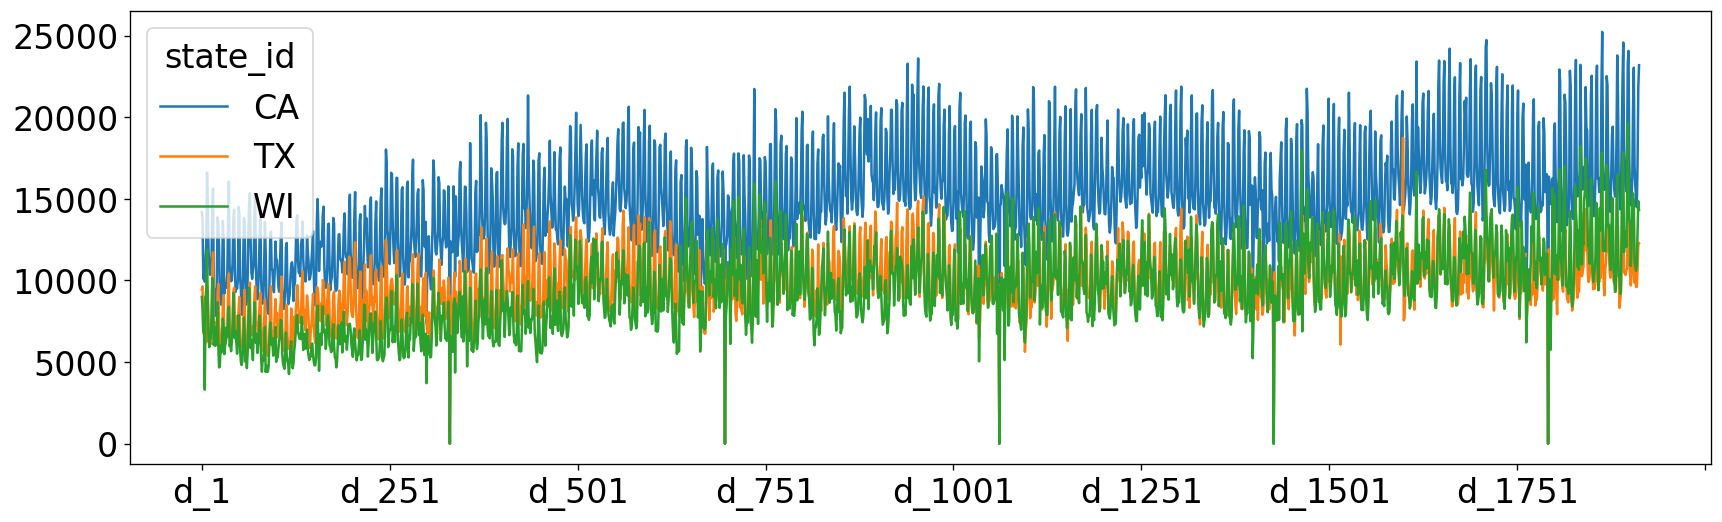

In [13]:
#各州 每日销量 CA 销量最高。 TX 与 WI 日销量几乎无差
data.groupby("state_id")[series_cols].sum().transpose().plot()
rcParams['figure.figsize'] = (17,5)


In [14]:
CA = data[data['state_id'] =='CA']
TX = data[data['state_id'] =='TX']
WI = data[data['state_id'] =='WI']

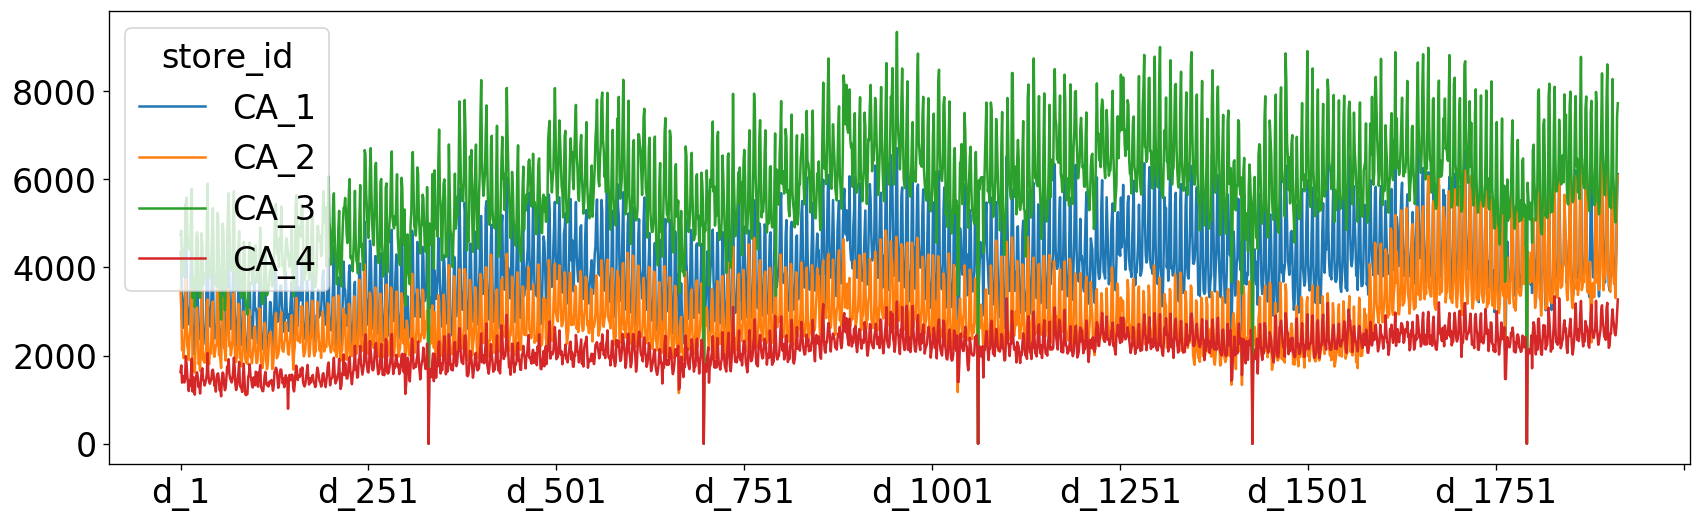

In [15]:
#CA 不同sotre 每日销量 [ 各州 sotre 销量 ]
CA.groupby("store_id")[series_cols].sum().transpose().plot()
rcParams['figure.figsize'] = (17,5)

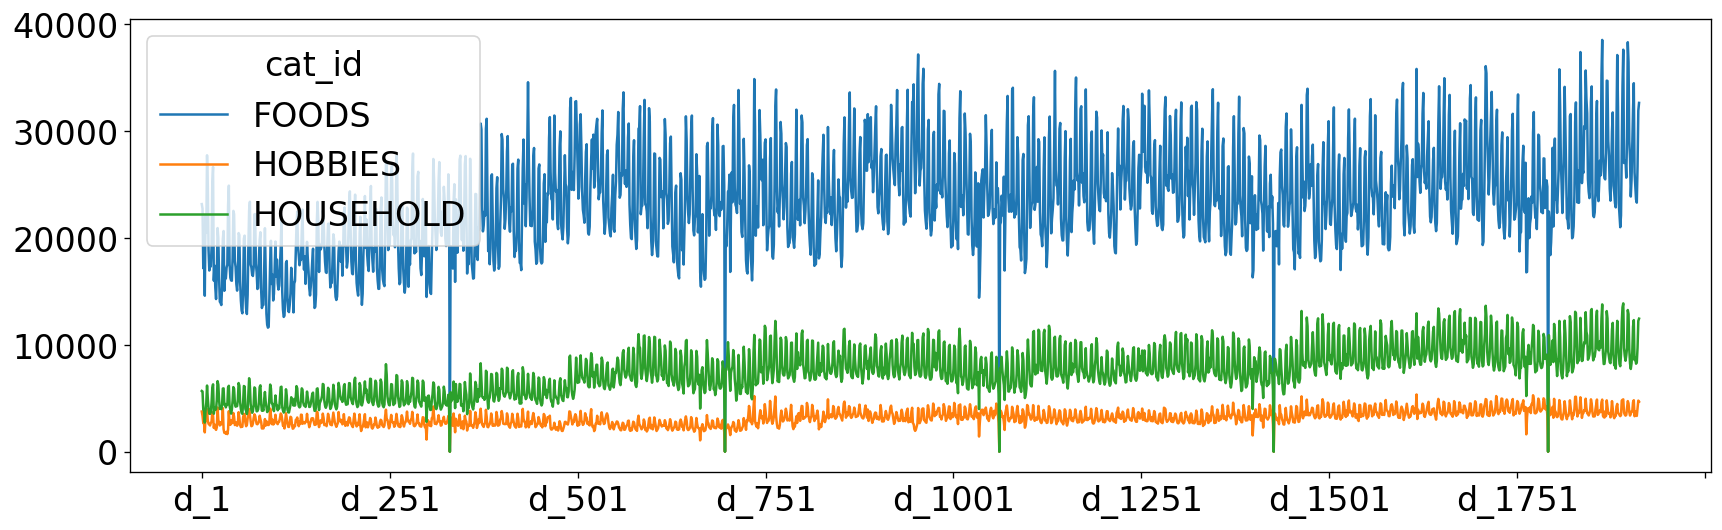

In [16]:
#不同分类 每日销量
data.groupby("cat_id")[series_cols].sum().transpose().plot()
rcParams['figure.figsize'] = (17,5)

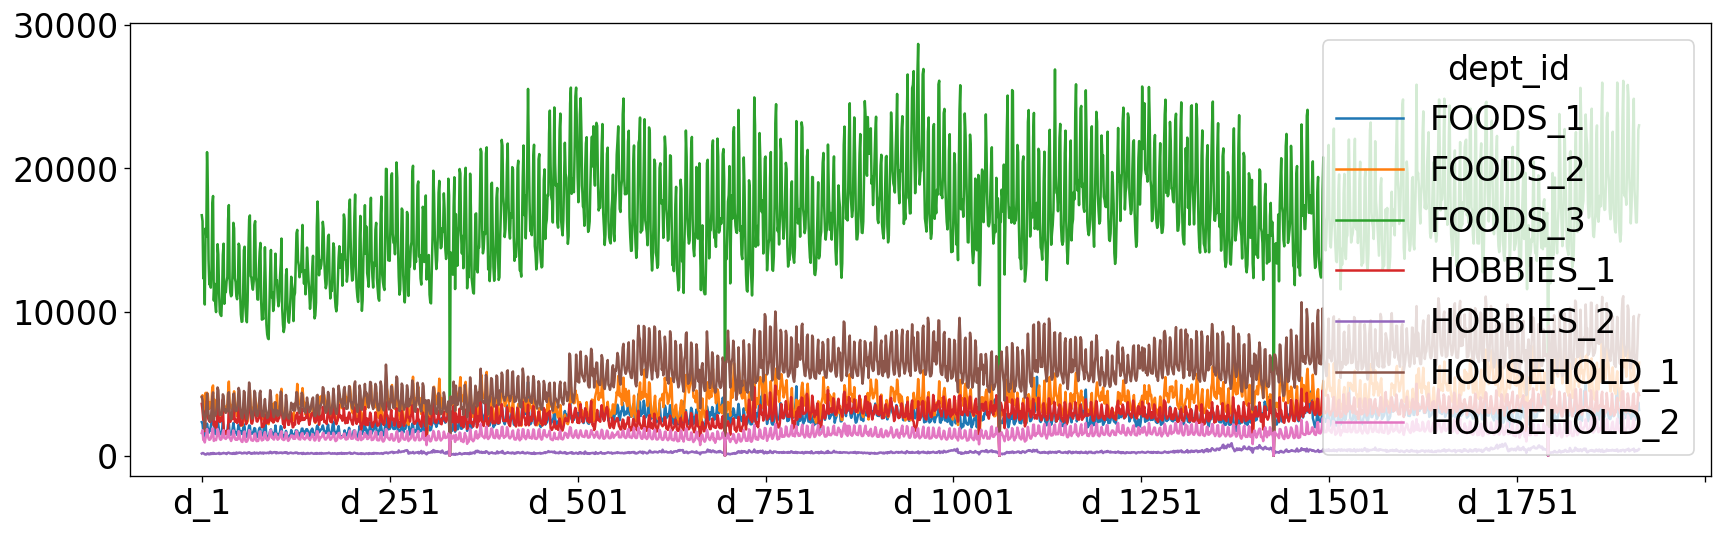

In [17]:
#不同 dept 每日销量 daily top:foods_3 
data.groupby("dept_id")[series_cols].sum().transpose().plot()
rcParams['figure.figsize'] = (17,5)

In [18]:
level_cols = data.columns[data.columns.str.contains("d_")==False].values
data[level_cols].head()

,id,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA


In [23]:
def find_quartil(l):
    
    if "0.005" in l:
        return 0.005
    elif "0.025" in l:
        return 0.025
    elif "0.165" in l:
        return 0.165
    elif "0.25" in l:
        return 0.25
    elif "0.5" in l:
        return 0.5
    elif "0.75" in l:
        return 0.75
    elif "0.835" in l:
        return 0.835
    elif "0.975" in l:
        return 0.975
    elif "0.995" in l:
        return 0.995
    else:
        return 0
    
def find_state(l):
    if "CA" in l:
        return "CA"
    elif "TX" in l:
        return "TX"
    elif "WI" in l:
        return "WI"
    else:
        return "Unknown"
    
def find_category(l):
    if "FOODS" in l:
        return "foods"
    elif "HOBBIES" in l:
        return "hobbies"
    elif "HOUSEHOLD" in l:
        return "household"
    else:
        return "Unknown"

In [24]:
submission_eda = pd.DataFrame(submission.id, columns=["id"])
submission_eda.loc[:, "lb_type"] = np.where(submission.id.str.contains("validation"), "validation", "evaluation")
submission_eda.loc[:, "u"] = submission.id.apply(lambda l: find_quartil(l))
submission_eda.loc[:, "state"] = submission.id.apply(lambda l: find_state(l))
submission_eda.loc[:, "category"] = submission.id.apply(lambda l: find_category(l))

In [32]:
submission_eda.loc[:, "lb_type"]
submission_eda.loc[:, "u"] 
np.where(submission.id.str.contains("validation"), "validation", "evaluation")
submission.id.str.contains("validation")

0          True
1          True
2          True
3          True
4          True
          ...  
771115    False
771116    False
771117    False
771118    False
771119    False
Name: id, Length: 771120, dtype: bool

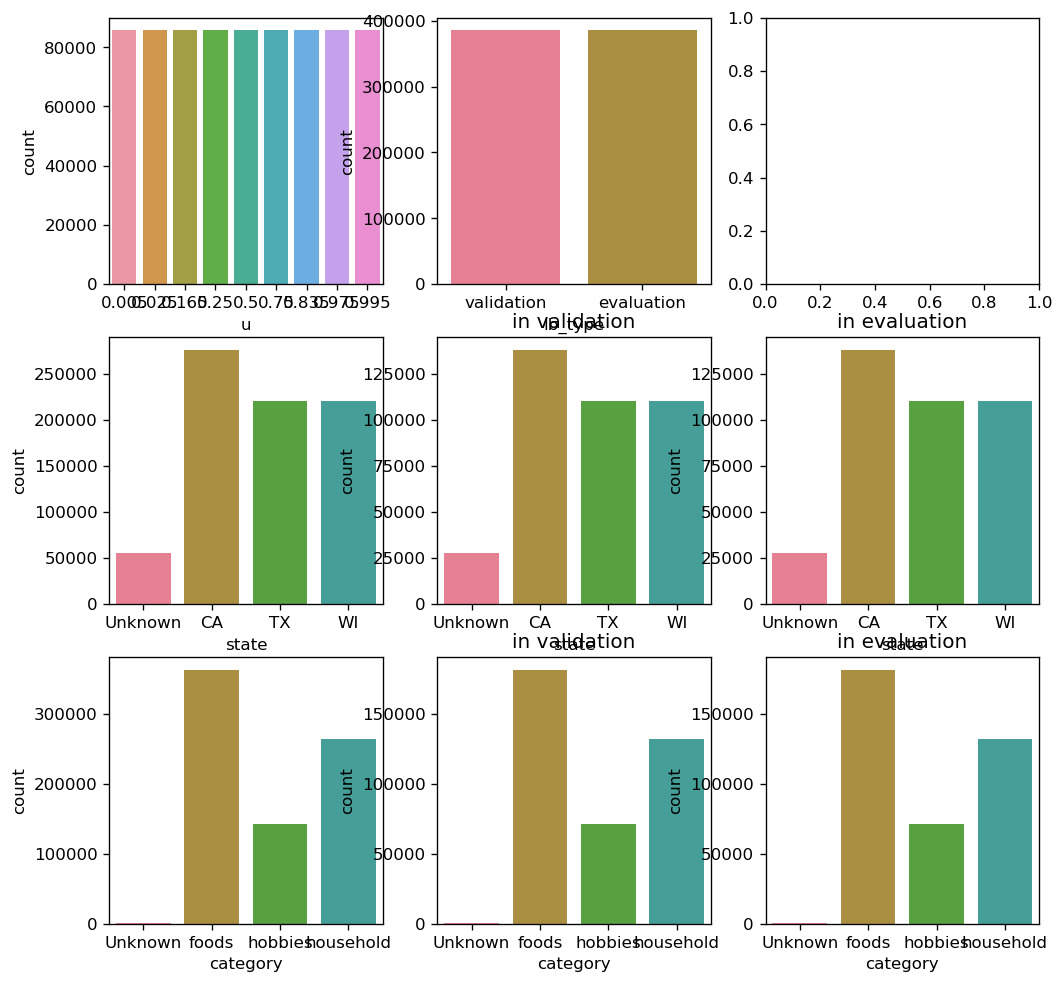

In [28]:
sns.set_palette("husl")

fig, ax = plt.subplots(3,3,figsize=(10,10))
sns.countplot(submission_eda.u, ax=ax[0,0]);
sns.countplot(submission_eda.lb_type, ax=ax[0,1]);
sns.countplot(submission_eda.state, ax=ax[1,0]);
sns.countplot(submission_eda.loc[submission_eda.lb_type=="validation"].state, ax=ax[1,1]);
sns.countplot(submission_eda.loc[submission_eda.lb_type=="evaluation"].state, ax=ax[1,2]);
sns.countplot(submission_eda.category, ax=ax[2,0]);
sns.countplot(submission_eda.loc[submission_eda.lb_type=="validation"].category, ax=ax[2,1]);
sns.countplot(submission_eda.loc[submission_eda.lb_type=="evaluation"].category, ax=ax[2,2]);
for n in range(1,3):
    ax[n,2].set_title("in evaluation")
    ax[n,1].set_title("in validation")

# 三表合并
### 每个产品，对应不同日期

In [21]:
data_days_cols =data_days.stack().reset_index(level=1)
data_days_cols.columns = ['d','sales']
data_days_cols


KeyboardInterrupt: 

In [ ]:
data_days_cols['day_int'] = data_days_cols.d.apply(lambda day:day.split('_')[1]).astype('int')
data_days_cols.sales = data_days_cols.sales.astype('int')
data_days_cols

In [42]:
data_new = data.drop(series_cols, axis=1).join(data_days_cols)
data_new = data_new.drop("d",axis=1)

In [43]:
data_new.head()

,id,item_id,dept_id,cat_id,store_id,state_id,sales,day_int
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,1
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,3
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,4
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,5


In [29]:
# d_cols = [col for col in data.columns if col.startswith('d_')]
# cc = data[d_cols].stack().reset_index(level=1)
# cc

,level_1,0
0,d_1,0
0,d_2,0
0,d_3,0
0,d_4,0
0,d_5,0
...,...,...
30489,d_1909,0
30489,d_1910,0
30489,d_1911,0
30489,d_1912,0


In [21]:
# d_cols = [col for col in data.columns if col.startswith('d_')]
# cc = data[d_cols].stack().reset_index(level=1)
# cc.columns = ['d','sales']
# cc['day_int'] = cc.d.apply(lambda day:day.split('_')[1]).astype('int')


In [45]:
sell_prices.store_id = sell_prices.store_id.astype('category')
sell_prices.item_id = sell_prices.item_id.astype('category')
sell_prices.wm_yr_wk = pd.to_numeric(sell_prices.wm_yr_wk, downcast='unsigned')
sell_prices.sell_price = pd.to_numeric(sell_prices.sell_price, downcast='float')
sell_prices.info()# save memory form 200+Mb to 58Mb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      category
item_id       category
wm_yr_wk      uint16
sell_price    float32
dtypes: category(2), float32(1), uint16(1)
memory usage: 58.8 MB


In [46]:
calendar = calendar.fillna('NotEvent')

calendar.date = calendar.date.astype('datetime64')

calendar.wm_yr_wk = pd.to_numeric(calendar.wm_yr_wk, downcast='unsigned')
calendar.weekday = calendar.weekday.astype('category')
calendar.wday = pd.to_numeric(calendar.wday, downcast='unsigned')
calendar.month = pd.to_numeric(calendar.month, downcast='unsigned')
calendar.year = pd.to_numeric(calendar.year, downcast='unsigned')
calendar.d = calendar.d.astype('category')

calendar.event_name_1 = calendar.event_name_1.astype('category')
calendar.event_type_1 = calendar.event_type_1.astype('category')
calendar.event_name_2 = calendar.event_name_2.astype('category')
calendar.event_type_2 = calendar.event_type_2.astype('category')

calendar.snap_CA = calendar.snap_CA.astype('bool')
calendar.snap_TX = calendar.snap_TX.astype('bool')
calendar.snap_WI = calendar.snap_WI.astype('bool')

calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null datetime64[ns]
wm_yr_wk        1969 non-null uint16
weekday         1969 non-null category
wday            1969 non-null uint8
month           1969 non-null uint8
year            1969 non-null uint16
d               1969 non-null category
event_name_1    1969 non-null category
event_type_1    1969 non-null category
event_name_2    1969 non-null category
event_type_2    1969 non-null category
snap_CA         1969 non-null bool
snap_TX         1969 non-null bool
snap_WI         1969 non-null bool
dtypes: bool(3), category(6), datetime64[ns](1), uint16(2), uint8(2)
memory usage: 144.0 KB


In [48]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [47]:
validation.id = validation.id.astype('category')
validation.item_id = validation.item_id.astype('category')
validation.dept_id = validation.dept_id.astype('category')
validation.cat_id = validation.cat_id.astype('category')
validation.store_id = validation.store_id.astype('category')
validation.state_id = validation.state_id.astype('category')
validation.d = validation.d.astype('category')

validation.sales = pd.to_numeric(validation.sales, downcast='unsigned')
validation.day_int = pd.to_numeric(validation.day_int, downcast='unsigned')

validation.info()

NameError: name 'validation' is not defined

In [23]:
data.head()
data[level_cols].head()

,id,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA


In [24]:
validation_data.head(100)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,day_int
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,3
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,4
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,5
...,...,...,...,...,...,...,...,...,...
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_96,0,96
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_97,0,97
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_98,0,98
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_99,0,99


In [25]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [26]:
# sell_prices.store_id = sell_prices.store_id.astype('category')
# sell_prices.item_id = sell_prices.item_id.astype('category')
# sell_prices.wm_yr_wk = pd.to_numeric(sell_prices.wm_yr_wk, downcast='unsigned')
# sell_prices.sell_price = pd.to_numeric(sell_prices.sell_price, downcast='float')
# sell_prices

In [27]:
calendar.head()
calendar = calendar.fillna(0)
calendar.date = calendar.date.astype('datetime64')

calendar.head()
# calendar.info()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,0,0,0,0,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,0,0,0,0,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,0,0,0,0,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,0,0,0,0,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,0,0,0,0,1,0,1


In [28]:
all_data = validation_data.merge(calendar, on='d', how='left').merge(sell_prices, on=['store_id','item_id','wm_yr_wk'], how='left')


In [29]:
all_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,day_int,date,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,2011-01-29,...,1,2011,0,0,0,0,0,0,0,NaN
1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2,2011-01-30,...,1,2011,0,0,0,0,0,0,0,NaN
2,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,3,2011-01-31,...,1,2011,0,0,0,0,0,0,0,NaN
3,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,4,2011-02-01,...,2,2011,0,0,0,0,1,1,0,NaN
4,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,5,2011-02-02,...,2,2011,0,0,0,0,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58327365,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1909,0,1909,2016-04-20,...,4,2016,0,0,0,0,0,0,0,1.0
58327366,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1910,0,1910,2016-04-21,...,4,2016,0,0,0,0,0,0,0,1.0
58327367,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1911,0,1911,2016-04-22,...,4,2016,0,0,0,0,0,0,0,1.0
58327368,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1912,0,1912,2016-04-23,...,4,2016,0,0,0,0,0,0,0,1.0


In [30]:
# all_data.to_csv("merge_data.csv.gz", compression='gzip')

In [ ]:
data_merged = pd.read_csv('merge_data.csv.gz')

In [ ]:
print(data_merged)
data_merged.head()

In [37]:
data_merged.sales.describe()

count    5.832737e+07
mean     1.126322e+00
std      3.873108e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.630000e+02
Name: sales, dtype: float64

In [38]:
data_merged.describe()

,Unnamed: 0,sales,day_int,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI,sell_price
count,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,4.602796e+07
mean,2.916368e+07,1.126322e+00,9.570000e+02,1.133919e+04,3.997386e+00,6.357554e+00,2.013209e+03,3.293257e-01,3.293257e-01,3.293257e-01,4.408089e+00
std,1.683766e+07,3.873108e+00,5.522355e+02,1.503742e+02,2.000652e+00,3.458773e+00,1.532086e+00,4.699684e-01,4.699684e-01,4.699684e-01,3.403657e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.110100e+04,1.000000e+00,1.000000e+00,2.011000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02
25%,1.458184e+07,0.000000e+00,4.790000e+02,1.121700e+04,2.000000e+00,3.000000e+00,2.012000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.180000e+00
50%,2.916368e+07,0.000000e+00,9.570000e+02,1.133300e+04,4.000000e+00,6.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.470000e+00
75%,4.374553e+07,1.000000e+00,1.435000e+03,1.144800e+04,6.000000e+00,9.000000e+00,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,5.840000e+00
max,5.832737e+07,7.630000e+02,1.913000e+03,1.161300e+04,7.000000e+00,1.200000e+01,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.073200e+02


In [ ]:
sns.distplot(data_merged.query('sales < 10').sales)
